#### Reinforcement learning lab 1
##### group member: 2
##### name: Zhengming Zhu, Xianao Lu
##### ID: 19990130-2035,   20021201-3338

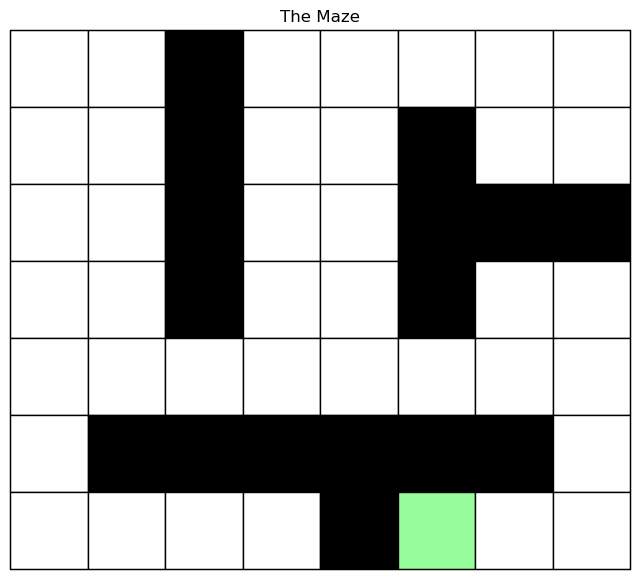

In [7]:
import numpy as np
import maze as mz
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
mz.draw_maze(maze)

env = mz.Maze(maze)
# env.show()

## Basic Maze

#### a) MDP formulation

We propose the following MDP formulation: 

##### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and all possible positions of the Minotaur in the maze. Formally, the state space is

$$\mathcal{S} = \big\lbrace (i,j,x,y):\textrm{such that the cell
} (i,j) \textrm{ is the position of the player and not an obstacle}, \\   (x,y) \textrm { is the position of the Minotaur}\big\rbrace.$$

##### Action space $\mathcal{A}$
We allow the player to chose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

##### Transition probabilities $\mathcal{P}$
Note that there is no randomness involved upon taking an action by the player. As a consequence, the transition probabilities are deterministic. More precisely, 
Only the player's next state is decided by the action deterministically. The action of the Minotaur is random and the transition probability is related to the position where the Minotaur is. 
- If at state (or position) $s$, the position of the Minotaur is in the middle of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{4}$. 
- If at state (or position)  $s$ , the position of the Minotaur is in the borders of the map (not in the corners), then $\mathbb{P}(s' \vert s, a) = \frac{1}{3}$.
- If at state (or position)  $s$ , the position of the Minotaur is in the corners of the map, then $\mathbb{P}(s' \vert s, a) = \frac{1}{2}$.


##### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to caught by the Minotaur then $r(s,a) = -\infty$
   - If at state $s$, taking action $a$, leads to some other position in the maze that is not the exit nor a wall nor an obstacle, then $r(s, a) = -1$. 
   - If at state $s$, taking action $a$, leads to the exit then $r(s ,a) = 0$. 
  

#### b) Moving in alternating rounds
The MDP model should be the same. But during the simulation step, there might be a higher probability for the player caught by the Minotaur if they move in alternating round. 
We can consider such a scenario as showed below. And the player chooses to move left and the Minotaur moves to the right. If they move at the same time, the player could survive as the game rule. But if they move in alternating rounds, the player would be caught for whether the player moving firstly or the Minotaur moving firstly.
![scenario](./scenario.png)

## Dynamic Programming

#### c) Solve the problem: find a policy that maximizes the probability of leaving the maze alive (in the shortest time possible) for T = 20. Illustrate this policy.

 The policy is solved as below. And the policy is a function related to the states and the time t. Such a function mapping can be illustrated as printed.

In [8]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy= mz.dynamic_programming(env,horizon);
np.set_printoptions(threshold=np.inf);

# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0,6,5);
path, _ = env.simulate(start, policy, method);
print(path)

[(0, 0, 6, 5), (0, 1, 6, 6), (1, 1, 6, 5), (2, 1, 6, 4), (3, 1, 5, 4), (4, 1, 5, 3), (4, 2, 5, 4), (4, 3, 6, 4), (4, 4, 5, 4), (4, 5, 5, 3), (4, 6, 5, 2), (4, 7, 4, 2), (5, 7, 4, 3), (6, 7, 3, 3), (6, 6, 4, 3), (6, 5, 3, 3), (6, 5, 4, 3), (6, 5, 4, 2), (6, 5, 4, 3), (6, 5, 5, 3), (6, 5, 4, 3)]


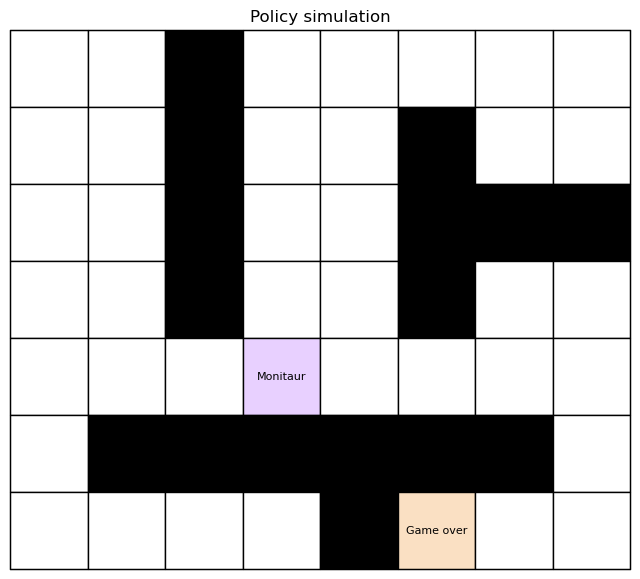

In [9]:
# Show the shortest path 
mz.animate_solution(maze, path)

 #### d)For T = 1,..., 30 compute a policy that maximizes the probability of exiting the maze alive (in the shortest time possible) and plot the probability. Is there a difference if the minotaur is allowed to stand still? If so, why?
 The probability would drop a bit if the Minotaur is allowed to stand still. Because the action space of the Minotaur is more complex and more unpredictable. Thus, it is harder to make an optimal decision to help the player exit the maze.

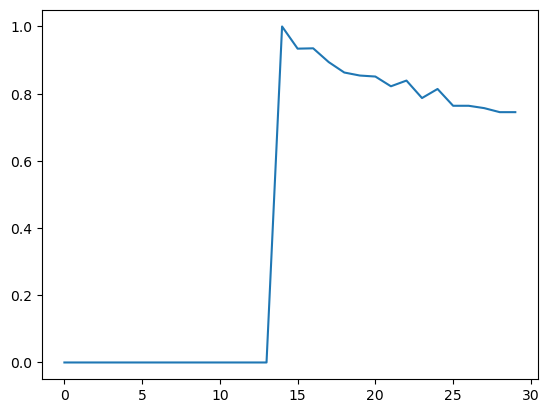

In [10]:
import matplotlib.pyplot as pyplt

N = 1000;
T = 31;
rate = [];
for t in range(1, T):
    success_cnt = 0;
    horizon = t;
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(0, N):
        method = 'DynProg';
        start  = (0, 0, 6, 5);
        path, flag= env.simulate(start, policy, method);
        if flag:
            success_cnt = success_cnt + 1;
    success_rate = success_cnt/N;
    rate.append(success_rate);

pyplt.plot(rate);

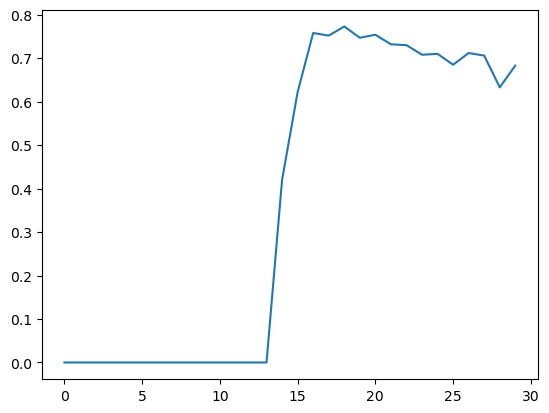

In [11]:
import matplotlib.pyplot as pyplt

env = mz.Maze(maze, Stay=True) # monitaur can be still

N = 1000;
T = 31;
rate = [];
for t in range(1, T):
    success_cnt = 0;
    horizon = t;
    # Solve the MDP problem with dynamic programming 
    V, policy= mz.dynamic_programming(env,horizon);
    for i in range(0, N):
        method = 'DynProg';
        start  = (0, 0, 6, 5);
        path, flag= env.simulate(start, policy, method);
        if flag:
            success_cnt = success_cnt + 1;
    success_rate = success_cnt/N;
    rate.append(success_rate);

pyplt.plot(rate);

#### e) The state "game over by poison" should be added to state space. And adding another reward of POISON_REWARD = -100.
The probability of transition will change because of new additional state. The action space and remain the same.
$$Alive: \\
r'(s,a) = r(s,a) \\ p'(s'|s,a) = \frac{29}{30} p(s'|s,a) \\
Dead: \\ r'(s,a) = -100 \\ p'(s'|s,a) = \frac{1}{30}
$$

In [12]:
# Discount Factor 
gamma   = 0.95; 
# Accuracy threshold 
epsilon = 0.0001;
V, policy = mz.value_iteration(env, gamma, epsilon, poison_mode=True)

1540.385167316568
1460.8146129704185
1342.1125261416737
1231.7380159711113
1129.6956819743918
1036.0555282853393
950.7468843979738
872.0334041119271
799.2982484029862
732.5580580395865
671.0322430955216
614.2545110038751
562.4453533442352
514.8329880771142
471.58191377953085
432.5765568486658
397.1658525893629
364.730641294565
334.9443055888421
307.5905206324195
282.4706281141053
259.40219348478706
238.2176810168625
218.76323706715198
200.89757270666797
184.49093760229
169.4241776981035
155.5878698527585
142.88152714811574
131.21286909768668
120.49715145470901
110.65655075257432
101.61959910778047
93.32066518064502
85.69947752422584
78.70068685974726
72.27346409953522
66.37113119807287
60.95082215023032
55.97317167462802
51.402029321200104
47.20419692663519
43.34918751096004
39.80900386423183
36.55793521531979
33.572370506068346
30.830626914739582
28.31279238336932
26.00058100539374
23.87720022328667
21.927228871718572
20.136505180528264
18.492023924118048
16.981841970315042
15.5949915

In [13]:
method = 'ValIter';
start  = (0,0,6,5);
path, _ = env.simulate(start, policy, method)
print(path)

[(0, 0, 6, 5), (0, 1, 6, 4), (1, 1, 6, 5), (2, 1, 6, 4), (3, 1, 6, 5), (4, 1, 6, 6), (4, 2, 6, 5), (4, 3, 6, 5), (4, 4, 6, 5), (4, 5, 6, 6), (4, 6, 6, 6), (4, 7, 5, 6), (4, 7, 6, 6), (5, 7, 6, 5), (6, 7, 6, 4), (6, 6, 6, 3), (6, 5, 6, 4), (6, 5, 6, 5)]


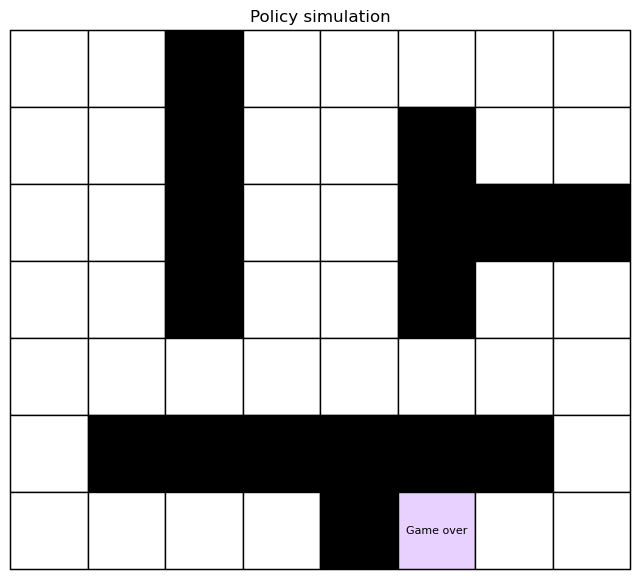

In [14]:
# Show the shortest path 
mz.animate_solution(maze, path)

#### (f)Estimate the probability of getting out alive using this policy by simulating 10000 games.

In [15]:
N = 10000;
success_cnt = 0;
for i in range(0,N):
    path, flag = env.simulate(start, policy, method);
    if flag:
        success_cnt = success_cnt + 1;
success_rate  = success_cnt/N;
print(success_rate)
        

0.4557


## Additional Questions
#### g) Theoretical questions:
##### 1)What does it mean that a learning method is on-policy or off-policy?

Observations in on-policy is generated under the policy $\pi_k$. Through iterations, $\pi_k$ will converge to the optimal policy.
Off-policy obtain observations from a certain policy $\pi_b$. It learns from the historical data.

##### 2)State the convergence conditions for Q-learning and SARSA.
  
The convergence condition for Q-learning is showed belowed,
  the learning rate,$\alpha_t$should satisfy
    $\sum_{t=0}^{\infty}\alpha_t=\infty$ and $\sum_{t=0}^{\infty}\alpha_t^2 < \infty$,
    and the behaviour exploring the state and action space enough.
  
SARSA cannot converge to a optimal policy, but when t is large enough, $\pi_t$ could be regarded as the optimal policy approximately.


#### (h)
We propose the following MDP formulation: 

##### State space $\mathcal{S}$
We model the state space as the set of all possible positions of the player and all possible positions of the Minotaur in the maze. Formally, the state space is

$$\mathcal{S} = \big\lbrace P\in(i,j,x,y):\textrm{such that the cell
} (i,j) \textrm{ is the position of the player and not an obstacle}, \\   (x,y) \textrm { is the position of the Minotaur}\big\rbrace\cup\big\lbrace{key}\big\rbrace\cup\big\lbrace{Poison\}.$$

##### Action space $\mathcal{A}$
We allow the player to choose to either move `left`, `right`, `down`, `up` or not move at all (`stay`). Note that sometimes the player cannot move in a certain direction because of an obstacle or a wall, yet we permit this to be action. We will see that this is not an issue as long as we define our transition probabilities and rewards appropriately.
Formally, the action space is

$$\mathcal{A} = \lbrace \textrm{up}, \textrm{ down}, \textrm{ left}, \textrm{ right}, \textrm{ stay} \rbrace.$$

##### Transition probabilities $\mathcal{P}$
Assume $M(s)$ is the number of directions that the Minotaur can take in state $\mathcal{S}$.(It could be 2, 3 or 4, depending on the position of the Mintaur)
- $\mathbb{P}(s' \vert s, a) = (1-P_{poison})0.35$, the Minotaur moving towards the player. 
- $\mathbb{P}(s' \vert s, a) = (1-P_{poison})\frac{0.65}{M(s)-1}$, the Minotaur moving randomly.
- $\mathbb{P}(s'=poison \vert s, a) = P_{poison}$, the Player is dead because of poison. 

##### Rewards $\mathcal{R}$
The objective of the player is to find the exit of the maze while avoiding the obstacles.    
   - If at state $s$, taking action $a$, leads to a wall or an obstacle then $r(s,a) = -1000$
   - If at state $s$, taking action $a$, leads to caught by the Minotaur then $r(s,a) = -1000$
   - If at state $s$, taking action $a$, leads to the exit with keys then $r(s ,a) = 10000$. 
   - If at state $s$, taking action $a$, leads to C without keys then $r(s ,a) = 10000$. 
   - If at state $s$, taking action $a$, leads to die by poison then $r(s ,a) = -1000$.
   - Else, then $r(s, a) = -1$. 

#### (i) Compute a policy that solves problem (h). Implement the episodic Q-learning algorithm using an ε-greedy policy. Note that you should not reset the Q-values between one episode and the other (remember to update the Q-values in each round!)
##### 1)Describe your implementation in pseudo code:
1: Initialize Q values and other parameters
2: for episodes k = 1,2,……,N do
3: $\quad$   Initialize environment and read initial state $s_0$ 
4: $\quad$    $t \leftarrow 0$
5: $\quad$    while Episode k is not finished do 
6: $\quad$    $\quad$   Select action $a_t$ according to some policy based on the Q-values
7: $\quad$    $\quad$   Observe the next state $s_{t+1}$ and rewards $r_t$
8: $\quad$    $\quad$   Update Q-values according to $(s_t, a_t, s_{t+1}, r_{t})$:
$$ Q^{(t+1)}(s,a) = Q^{(t)}(s,a) + 1_{(s_t,a_t)=_{(s,a)}a_{n^{(t)}}(s_t,a_t)} [r_t+\lambda \max_{b \in A}Q^{(t)}(s_{t+1}, b) - Q^{(t)}(s_t,a_t) ]$$
9: $\quad$    $\quad$   $t \leftarrow t+1$
10:$\quad$ end while
11:end for 





#### Compute the policy by Q-learning

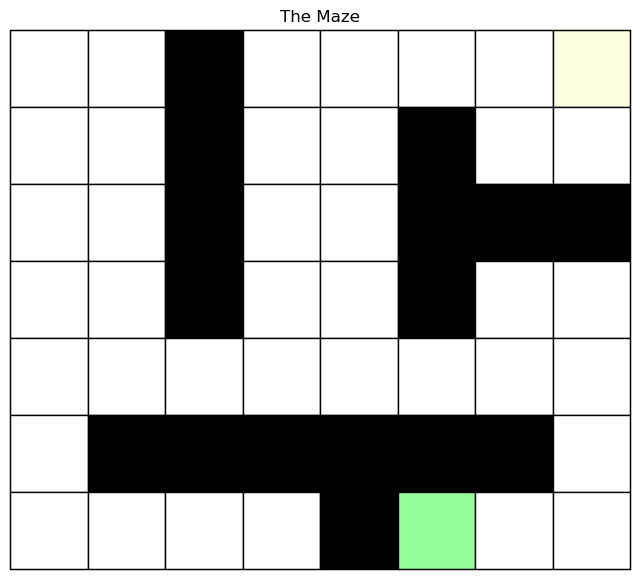

In [10]:
import numpy as np
import maze_bonus_Q_learning as mz_Q
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key
mz_Q.draw_maze(maze)

env = mz_Q.Maze(maze)
# env.show()

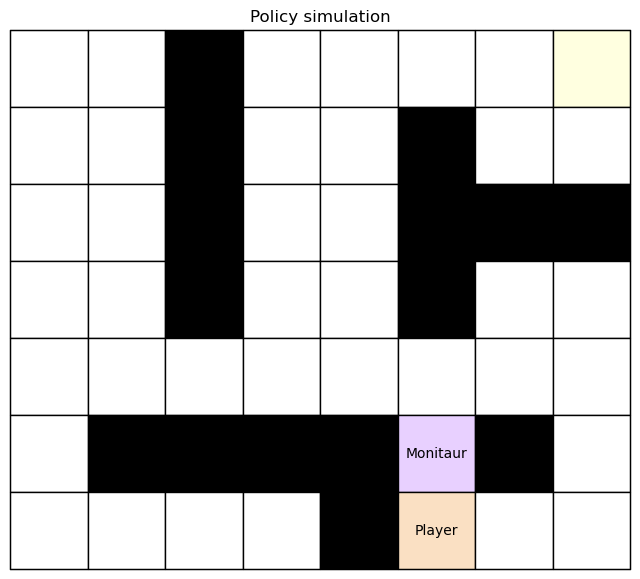

In [11]:
# initialization
import matplotlib.pyplot as plt
epsilon1 = 0.1;
epsilon2 = 0.4;
alpha1 = 2/3;
alpha2 = 0.8;
num_episodes = 50000;
gamma = 0.95;
start = (0,0,6,5,0);

# epsilon1 = 0.1;
td_errors1, policy1, V1 = mz_Q.Q_learning(env, epsilon1, num_episodes, gamma, start,alpha1, poison_mode=True)
# epsilon1 = 0.2;
td_errors2, policy2, V2 = mz_Q.Q_learning(env, epsilon2, num_episodes, gamma,  start, alpha1, poison_mode=True)
# # # alpha1 = 2/3;
td_errors3, policy3, V3= mz_Q.Q_learning(env, epsilon1, num_episodes, gamma, start, alpha2, poison_mode=True)

# animate the solution
method = 'Q-learning';
path, _ = env.simulate(start, policy1, method)
mz_Q.animate_solution(maze, path)

##### 2)Solve the Problem for 2 different values of the exploration parameter ε. Create a plot of the value function over episodes of the initial state, showing the convergence of the algorithm. Use a step size of $1/n(s, a)^{2/3}$, where n(s, a) is the number of times you visited the pair (s, a). Discuss the results, and whether a proper initialization of the Q-values may affect convergence speed. Note: Simulate for 50000 episodes.
As a matter of fact, high $\epsilon$ means that more exploration, the algorithm tends to explore new actions rather than repeating what it already knows to be the best action. On the other hand, low $\epsilon$ means more exploitation. Therefore, according to the experiment, we set $\epsilon$ = 0.1 and 0.4, we can see that bigger $\epsilon$ brings quicker convergence speed at first, because player can explore more space, then smaller $\epsilon$ make the model converge quicker since it already found the best choice.

In [18]:
def moving_average(data, window_size):
    weights = np.ones(window_size) / window_size
    return np.convolve(data, weights, mode='valid')

Text(0.5, 1.0, 'epsilon=0.2, alpha=2/3')

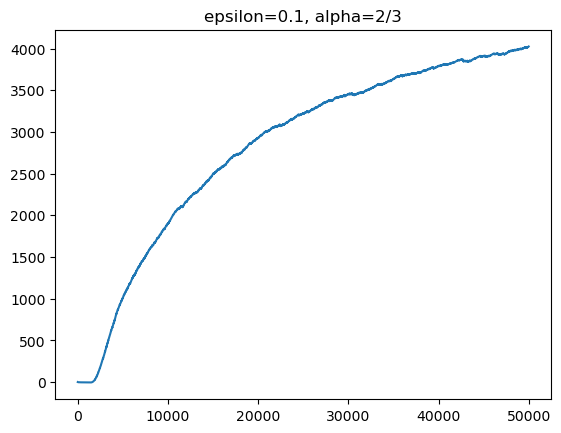

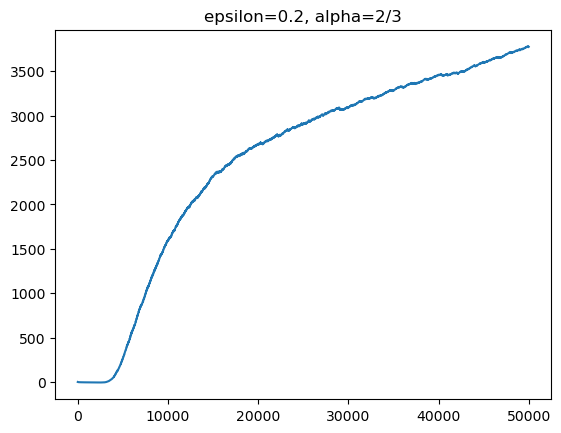

In [19]:
V1_smoothed = moving_average(V1, window_size=1)
V2_smoothed = moving_average(V2, window_size=1)
# plot 1
# plt.subplot(2,1,1)
plt.figure(1)
plt.plot(V1_smoothed)
plt.title('epsilon=0.1, alpha=2/3')
# plot 2
plt.figure(2)
# plt.subplot(2,1,2)
fig2 = plt.plot(V2_smoothed)
plt.title('epsilon=0.2, alpha=2/3')

##### 3) Fix the value of the exploration parameter ε. Show the convergence of the algorithm for 2 different step sizes $1/n(s, a)^α$, with α ∈ (0.5, 1]. Discuss the results.

We fixed $\epsilon$ = 0.1, and choose $\alpha$=0.67 and 0.8. We can find that the function of $\alpha$ is balancing the learning rate, which makes it decrease from time to time. Because bug learning rate make Q value move faster towards the optimal target. So, we can see the impact on convergence, when $\alpha$ is larger, the convergence speed is slower. 

Text(0.5, 1.0, 'epsilon=0.1, alpha=0.8')

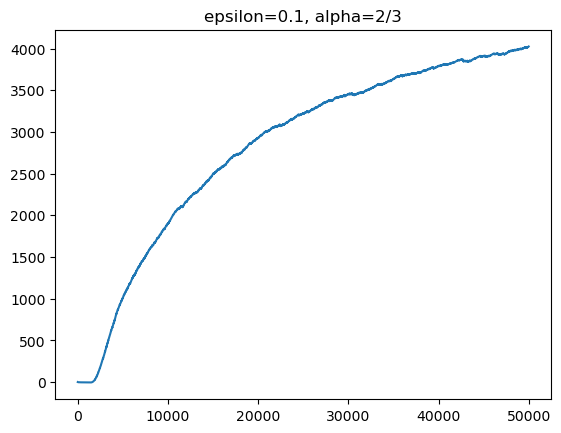

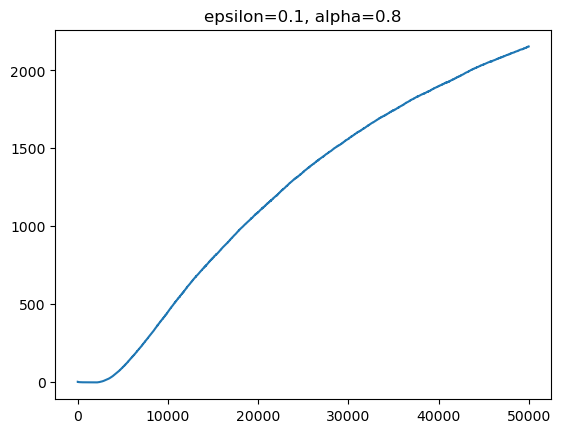

In [20]:
V1_smoothed = moving_average(V1, window_size=1)
V3_smoothed = moving_average(V3, window_size=1)

# plot 1
# plt.subplot(2,1,1)
plt.figure(1)
plt.plot(V1_smoothed)
plt.title('epsilon=0.1, alpha=2/3')
# plot 2
plt.figure(2)
# plt.subplot(2,1,2)
plt.plot(V3_smoothed)
plt.title('epsilon=0.1, alpha=0.8')

#### (j) Now compute a policy that solves problem (h) by implementing the SARSA algorithm.

In [1]:
import maze_bonus_sarsa as mz_S
import numpy as np

maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0],
])
env = mz_S.Maze(maze)

In [8]:
episodes = 50000
epsilon = 0.2
alpha = 2/3
lambda_para = 0.95
sarsa, re, conv, Q_init= mz_S.SARSA_algorithm(env, episodes, epsilon, alpha, lambda_para)

path = mz_S.sarsa_simulation(env, sarsa)      #an example simulation under the solved policy
print(path)

[(0, 0, 6, 5), (1, 0, 5, 5), (2, 0, 5, 4), (3, 0, 4, 4), (3, 1, 3, 4), (4, 1, 3, 3), (4, 2, 3, 4), (4, 3, 3, 5), (3, 3, 3, 4), (2, 3, 3, 3), (2, 4, 4, 3), (1, 4, 5, 3), (0, 4, 6, 3), (0, 5, 5, 3), (0, 6, 4, 3), (0, 7, 5, 3), (0, 6, 6, 3), (0, 6, 5, 3), (0, 5, 4, 3), (0, 5, 4, 2), (0, 4, 4, 1), (1, 4, 3, 1), (2, 4, 3, 2), (3, 4, 3, 1), (4, 4, 4, 1), (4, 5, 4, 2), (4, 6, 4, 3), (4, 7, 4, 4), (5, 7, 4, 3), (6, 7, 4, 4), (6, 6, 4, 3), (6, 5, 4, 4)]


##### 1) What differs in the implementation with respect to Q-learning?
SARSA uses $\epsilon-greedy$ method to gain the action for the next state before the Q-value updated, and uses this action to update the Q-value. Q-learning only uses the current state , the current action, reward and the next state for Q-value updating.
##### 2) Solve for $\epsilon = 0.2$ and $\epsilon = 0.1$, using a step size of $\frac{1}{n(s, a)^\alpha}$, with $\alpha = 2/3$. Create a plot of the value function over episodes of the initial state. Discuss the results, and whether a proper initialization of the Q-values may affect convergence speed. Note: Simulate for 50000 episodes.
The Q-value can increase more rapidly with $\epsilon = 0.1$. But the success rate is higher if having $\epsilon = 0.2$, maybe it is because the state space can be explored more.
A proper initialization of Q-values will increase the convergence speed. A Q-value which is closer to the true state will help the convergence.

Text(0.5, 1.0, 'ε = 0.2')

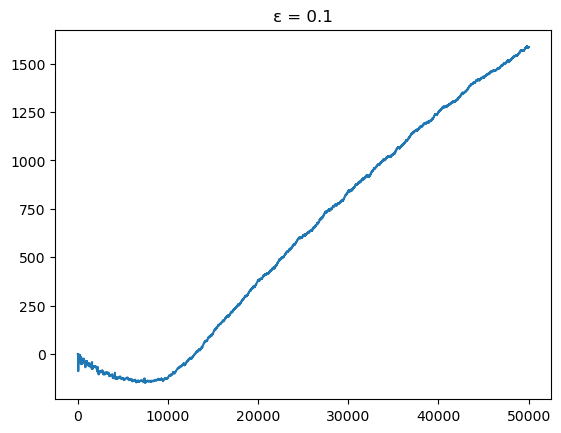

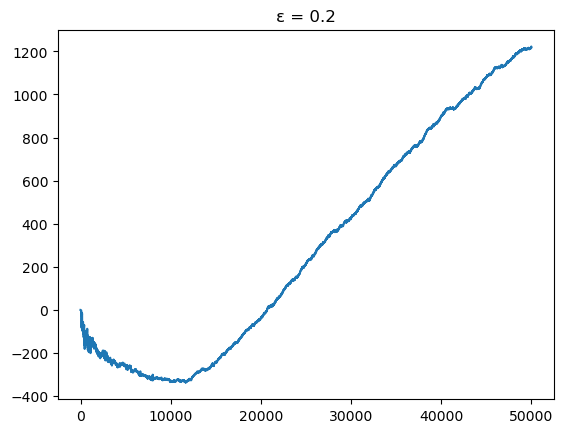

In [4]:
import matplotlib.pyplot as plt
episodes = 50000
epsilon = 0.1
alpha = 2/3
lambda_para = 0.95
sarsa1, re_1, conv_1, Q_init_1= mz_S.SARSA_algorithm(env, episodes, epsilon, alpha, lambda_para)
epsilon = 0.2
sarsa2, re_2, conv_2, Q_init_2= mz_S.SARSA_algorithm(env, episodes, epsilon, alpha, lambda_para)
plt.figure(1)
plt.plot(Q_init_1)
plt.title("ε = 0.1")
plt.figure(2)
plt.plot(Q_init_2)
plt.title("ε = 0.2")

In [5]:
Num = 50000
cnt = 0
for i in range(Num):
    path = mz_S.sarsa_simulation(env, sarsa1)
    if(env.maze[path[-1][0]][path[-1][1]] == 2):
        cnt += 1
print("success rate with ε = 0.1:",cnt/Num)

cnt = 0
for i in range(Num):
    path = mz_S.sarsa_simulation(env, sarsa2)
    if(env.maze[path[-1][0]][path[-1][1]] == 2):
        cnt += 1
print("success rate with ε = 0.2:",cnt/Num)

success rate with ε = 0.1: 0.24288
success rate with ε = 0.2: 0.48622


##### 3) Now consider the case where the exploration parameter $\epsilon$ decreases in each episode (for example, in episode $k = 1,...$ choose $\epsilon_k = 1/k^\delta$ with $\delta \in (0.5, 1]$). Does convergence improve? Is it better to have $\alpha > \delta$, or the opposite? Argument your answers.
The convergence has been improved compared to set $\epsilon$ fixed.
Bigger $\delta$ indicates smaller $\epsilon$. With a smaller $\epsilon$, the agent will explore more conservatively. And bigger $\alpha$ also means a smaller learning rate. So the agent will absorb new information less. But too big $\epsilon$ and learning rate might make the learning process more unstable. Thus, I think there is a balance between how fast we should take into the new information and how aggressively we should explore the space ,and these two value need to be selected cautiously. It is hard to judge whether it is better to have $\alpha > \delta$, or $\alpha < \delta$.

Text(0.5, 1.0, 'changing ε')

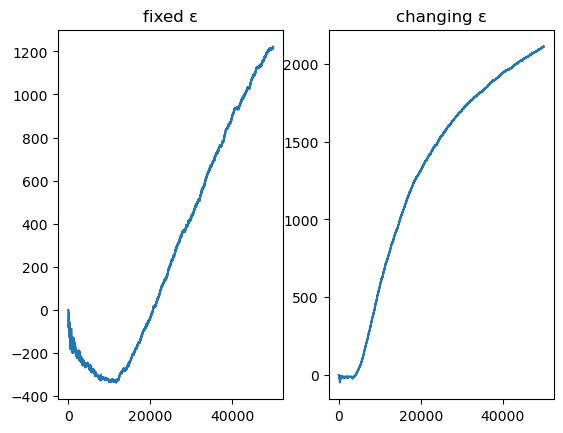

In [7]:
import matplotlib.pyplot as plt
episodes = 50000
epsilon = 0.2
alpha = 2/3
lambda_para = 0.95
sarsa_3, re_3, conv_3, Q_init_3= mz_S.SARSA_algorithm(env, episodes, epsilon, alpha, lambda_para, True)
plt.subplot(1, 2, 1)
plt.plot(Q_init_2)
plt.title("fixed ε")
plt.subplot(1, 2, 2)
plt.plot(Q_init_3)
plt.title("changing ε")

##### (k)Estimate the probability of leaving the maze using (1) a policy computed through Q-learning, and (2) another policy computed using SARSA. (Somewhat harder question) Are the probabilities close to the Q-value of the initial state (for the respective learning method)? If so/not, explain why.
In general, the policy solved by Q-learning can achieve a higher probability for exiting the maze successfully.

There is no hard relationship between the Q-value of the initial state and the probability, since there are other rewards along the path besides the exit reward. If we set the only reward as the exiting reward,
$$ R=\left\{
\begin{aligned}
&1 & &, if\ the\ player\ exits\ successfully&\\
&0 & &, else&\\
\end{aligned}
\right.$$ 
then the probability would be related to the Q-value of the initial state.

In [12]:
# probability of leaving the maze using (1) a policy computed through Q-learning,
env = mz_Q.Maze(maze);
method = 'Q-learning';
start  = (0,0,6,5,0);
N = 50000;
success_cnt = 0;
for i in range(0,N):
    path, flag = env.simulate(start, policy1, method);
    if flag:
        success_cnt = success_cnt + 1;
success_rate  = success_cnt/N;
print("success rate with Q-learning",success_rate)

success rate with Q-learning 0.54192


In [6]:
# probability of leaving the maze using (1) a policy computed through Sarsa
cnt = 0
env = mz_S.Maze(maze)
for i in range(Num):
    path = mz_S.sarsa_simulation(env, sarsa2)
    if(env.maze[path[-1][0]][path[-1][1]] == 2):
        cnt += 1
print("success rate with SARSA",cnt/Num)

success rate with SARSA 0.48766
